# Univariate Time Series
# **Multilayer Perceptron (MLP)**
Sequential model

Notebook developed by: Jose Peris

Solved by [me](https://github.com/viasmo1)


## Import dependencies
-**py dependencies**
-Our DL framework: **Keras**
-Pour DL backend: **Tensorflow**



In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [2]:
# Welcome to deep learning ;)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [3]:
df = pd.read_csv("/content/vix_2011_2019.csv")

In [4]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2011-01-03  17.940001  17.950001  16.910000  17.610001  17.610001       0
1  2011-01-04  17.340000  18.240000  17.330000  17.379999  17.379999       0
2  2011-01-05  17.809999  17.950001  16.860001  17.020000  17.020000       0
3  2011-01-06  16.799999  17.559999  16.790001  17.400000  17.400000       0
4  2011-01-07  17.309999  18.070000  16.570000  17.139999  17.139999       0


We are going to use an univariate time series model, so we have to remain just the **time series and  target column**

In [5]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [6]:
# Now we check the nuember of rows and columns of our dataset
df.shape

(2068, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2068 non-null   object 
 1   Adj Close  2068 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.4+ KB


We have to convert our series (object) into **datetime format**

In [8]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg:Union[~DatetimeScalar, List, Tuple, ~ArrayLike, _ForwardRef('Series')], errors:str='raise', dayfirst:bool=False, yearfirst:bool=False, utc:Union[bool, NoneType]=None, format:Union[str, NoneType]=None, exact:bool=True, unit:Union[str, NoneType]=None, infer_datetime_format:bool=False, origin='unix', cache:bool=True) -> Union[pandas.core.indexes.datetimes.DatetimeIndex, _ForwardRef('Series'), ~DatetimeScalar, _ForwardRef('NaTType')]
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

And we have to indicate that the time series will be the **index** of our dataframe

In [10]:
df = df.set_index(['Date'], drop=True)

In [11]:
# and we check again the structure of our dataset
df.head(10)

,Adj Close
Date,
2011-01-03,17.610001
2011-01-04,17.379999
2011-01-05,17.020000
2011-01-06,17.400000
2011-01-07,17.139999
2011-01-10,17.540001
2011-01-11,16.889999
2011-01-12,16.240000
2011-01-13,16.389999


Now, let's plot our **time series data**

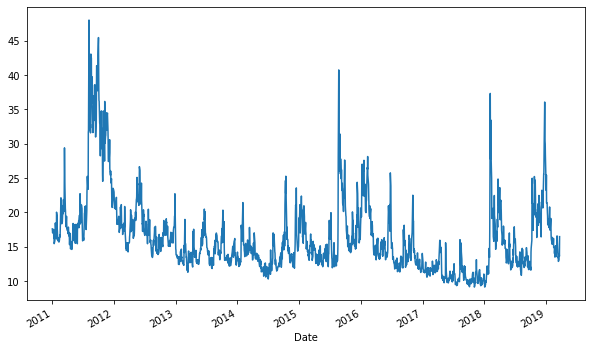

In [12]:
# df = df.sort_index()
plt.figure(figsize=(10, 6))
df['Adj Close'].plot();

## Train-test split
We will take 2018/01/01 as timestamp to split, due that we are working with time series









In [13]:
split_date = pd.Timestamp('2018-01-01')

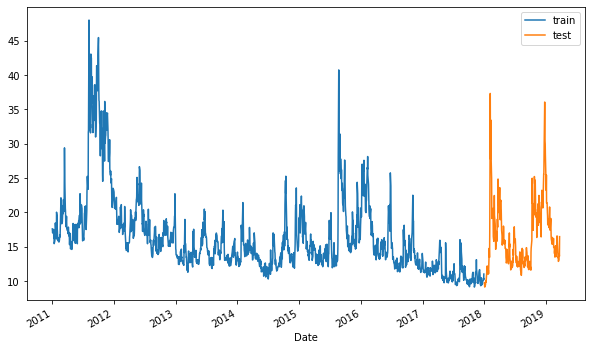

In [14]:
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);


In [15]:
# Convert pandas Dataframe to Numpy Array. We need to convert data to array in DL
train_numpy = train.values
test_numpy = test.values


In [16]:
# Normalize. scale train and test data to [-1, 1]

train_sc = train_numpy.reshape(-1,1)
test_sc = test_numpy.reshape(-1,1)

In [17]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

## Neural network declaration

### **NN Sequential Fully connected**

In [18]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
1760/1760 [==============================] - 2s 840us/step - loss: 20.6181
Epoch 2/100
1760/1760 [==============================] - 1s 849us/step - loss: 3.1378
Epoch 3/100
1760/1760 [==============================] - 1s 842us/step - loss: 3.1324
Epoch 4/100
1760/1760 [==============================] - 2s 873us/step - loss: 3.1240
Epoch 5/100
1760/1760 [==============================] - 2s 870us/step - loss: 3.1172
Epoch 6/100
1760/1760 [==============================] - 1s 816us/step - loss: 3.1121
Epoch 7/100
1760/1760 [==============================] - 1s 827us/step - loss: 3.1087
Epoch 8/100
1760/1760 [==============================] - 2s 861us/step - loss: 3.1065
Epoch 9/100
1760/1760 [==============================] - 1s 828us/step - loss: 3.1053
Epoch 10/100
1760/1760 [==============================] - 2s 874us/step - loss: 3.1049
Epoch 11/100
1760/1760 [==============================] - 1s 847us/step - loss: 3.1050
Epoch 12/100
1760/1760 [===========================

**Congratulations! training complete! ;)**

Let´s check the architecture of our model

In [19]:
# Show model information
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Check the **accuracy** on training and test

In [20]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.871
The R2 score on the Test set is:	0.762


### **Long short term memory - LSTM (RNN)**

First, we need to preprocess the data

In [21]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [22]:
X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (1760, 1, 1)
Test shape:  (306, 1, 1)


Then, we train de LSTM model

In [23]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
1760/1760 [==============================] - 3s 1ms/step - loss: 940.0557
Epoch 2/100
1760/1760 [==============================] - 2s 1ms/step - loss: 7.1345
Epoch 3/100
1760/1760 [==============================] - 2s 1ms/step - loss: 5.2227
Epoch 4/100
1760/1760 [==============================] - 2s 1ms/step - loss: 4.7781
Epoch 5/100
1760/1760 [==============================] - 2s 1ms/step - loss: 4.5394
Epoch 6/100
1760/1760 [==============================] - 2s 1ms/step - loss: 4.3017
Epoch 7/100
1760/1760 [==============================] - 2s 1ms/step - loss: 4.0483
Epoch 8/100
1760/1760 [==============================] - 2s 1ms/step - loss: 3.8548
Epoch 9/100
1760/1760 [==============================] - 2s 1ms/step - loss: 3.7080
Epoch 10/100
1760/1760 [==============================] - 2s 1ms/step - loss: 3.5926
Epoch 11/100
1760/1760 [==============================] - 2s 1ms/step - loss: 3.4995
Epoch 12/100
1760/1760 [==============================] - 2s 1ms/step - 

In [24]:
# Show model information
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


And check the new **accuracy**

In [25]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.845
The R2 score on the Test set is:	0.777


In [26]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

306/306 [==============================] - 0s 882us/step - loss: 4.9955
NN: 5.328382
LSTM: 4.995488


In [27]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

## Plotting results

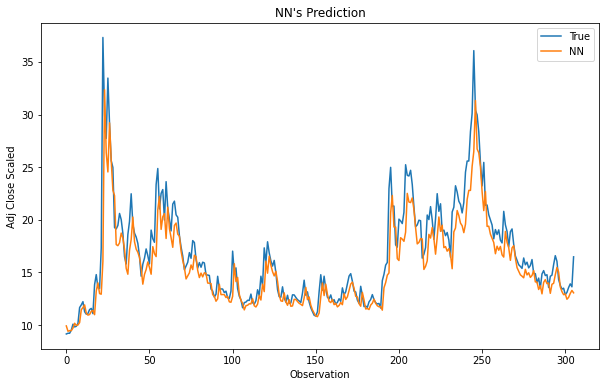

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

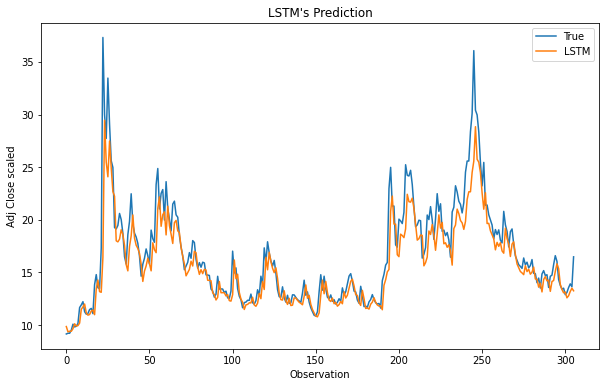

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

# **WELCOME TO THE DEEP LEARNING WORLD** ;)